In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [77]:
# leer datos csv
df_elec_M = pd.read_csv('data/Datos_Electronica_Sistemas - M. Elec.csv')
df_elec_I = pd.read_csv('data/Datos_Electronica_Sistemas - I. Elec.csv')
df_elec_G = pd.read_csv('data/Datos_Electronica_Sistemas - G. Elec.csv')
df_sis_M = pd.read_csv('data/Datos_Electronica_Sistemas - M. Sis.csv')
df_sis_I = pd.read_csv('data/Datos_Electronica_Sistemas - I. Sis.csv')
df_sis_G = pd.read_csv('data/Datos_Electronica_Sistemas - G. Sis.csv')

# Valores de la fila 0 son el nombre de la columna
df_elec_M.columns = df_elec_M.iloc[0]
df_elec_I.columns = df_elec_I.iloc[0]
df_elec_G.columns = df_elec_G.iloc[0]
df_sis_M.columns = df_sis_M.iloc[0]
df_sis_I.columns = df_sis_I.iloc[0]
df_sis_G.columns = df_sis_G.iloc[0]

# Eliminar la primera fila de cada df
df_elec_M = df_elec_M.iloc[ 1: , :]
df_elec_I = df_elec_I.iloc[ 1: , :]
df_elec_G = df_elec_G.iloc[ 1: , :]
df_sis_M = df_sis_M.iloc[ 1: , :]
df_sis_I = df_sis_I.iloc[ 1: , :]
df_sis_G = df_sis_G.iloc[ 1: , :]

# hacer llave la primera columna
df_elec_M = df_elec_M.set_index(df_elec_M.columns[0])
df_elec_I = df_elec_I.set_index(df_elec_I.columns[0])
df_elec_G = df_elec_G.set_index(df_elec_G.columns[0])
df_sis_M = df_sis_M.set_index(df_sis_M.columns[0])
df_sis_I = df_sis_I.set_index(df_sis_I.columns[0])
df_sis_G = df_sis_G.set_index(df_sis_G.columns[0])

# Volver las columnas numericas
cols_to_convert = ['Matriculados', 'Oficial', 'Privada', 'Hombres', 'Mujeres']
df_elec_M[cols_to_convert] = df_elec_M[cols_to_convert].replace(',', '', regex=True).astype(int)
df_sis_M[cols_to_convert] = df_sis_M[cols_to_convert].replace(',', '', regex=True).astype(int)

cols_to_convert = ['Primer curso', 'Oficial', 'Privada', 'Hombres', 'Mujeres']
df_elec_I[cols_to_convert] = df_elec_I[cols_to_convert].replace(',', '', regex=True).astype(int)
df_sis_I[cols_to_convert] = df_sis_I[cols_to_convert].replace(',', '', regex=True).astype(int)

cols_to_convert = ['Graduados', 'Oficial', 'Privada', 'Hombres', 'Mujeres']
df_elec_G[cols_to_convert] = df_elec_G[cols_to_convert].replace(',', '', regex=True).astype(int)
df_sis_G[cols_to_convert] = df_sis_G[cols_to_convert].replace(',', '', regex=True).astype(int)

In [78]:
# Obtener los valores totales de los años
años = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for año in años:
    df_elec_M.loc[str(año)] = df_elec_M.loc[f'{año} - 1'] + df_elec_M.loc[f'{año} - 2']
    df_elec_I.loc[str(año)] = df_elec_I.loc[f'{año} - 1'] + df_elec_I.loc[f'{año} - 2']
    df_elec_G.loc[str(año)] = df_elec_G.loc[f'{año} - 1'] + df_elec_G.loc[f'{año} - 2']
    df_sis_M.loc[str(año)] = df_sis_M.loc[f'{año} - 1'] + df_sis_M.loc[f'{año} - 2']
    df_sis_I.loc[str(año)] = df_sis_I.loc[f'{año} - 1'] + df_sis_I.loc[f'{año} - 2']
    df_sis_G.loc[str(año)] = df_sis_G.loc[f'{año} - 1'] + df_sis_G.loc[f'{año} - 2']

In [82]:
# Separar las filas con llaves correspondientes a los años
for i, año in enumerate(años):
  años[i] = str(año)
df_elec_M = df_elec_M.loc[años]
df_elec_I = df_elec_I.loc[años]
df_elec_G = df_elec_G.loc[años]
df_sis_M = df_sis_M.loc[años]
df_sis_I = df_sis_I.loc[años]
df_sis_G = df_sis_G.loc[años]

## Análisis INGENIERÍA ELECTRONICA

Error cuadrático medio (MSE): 1392414.3255774537
Coeficientes: [    0.         -1287.98321678   111.61072261]
Intercepto: 43847.35151515152


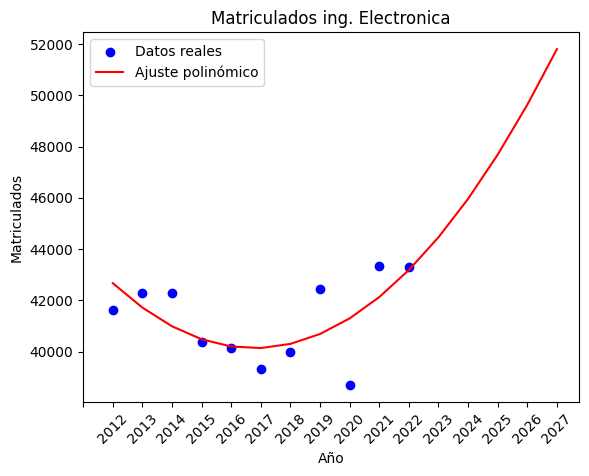

In [122]:
# Ejemplo de datos
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).reshape(-1, 1)
y = df_elec_M['Matriculados'].to_numpy()

# Crear características polinómicas
degree = 2  # Cambiar el grado para una curva más compleja
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)

# Ajustar un modelo de regresión lineal a las características polinómicas
model = LinearRegression()
model.fit(x_poly, y)

x_pred = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)
x_poly_pred = poly_features.fit_transform(x_pred)

# Predicción
y_pred = model.predict(x_poly)

# Evaluar el modelo
mse = mean_squared_error(y, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

y_pred = model.predict(x_poly_pred)

# Visualizar resultados
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x_pred, y_pred, color='red', label='Ajuste polinómico')
plt.title(f'Matriculados ing. Electronica')
plt.xlabel('Año')
plt.ylabel('Matriculados')

# mostrar años desde 2012 hasta 2027 (en cadenas de caracteres)
años = ['','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027']
plt.xticks(ticks=range(len(años)), labels=años, rotation=45)

plt.legend()
plt.show()

Error cuadrático medio (MSE): 43853.1497351134
Coeficientes: [  0.         203.19440559 -20.46620047]
Intercepto: 5273.733333333333


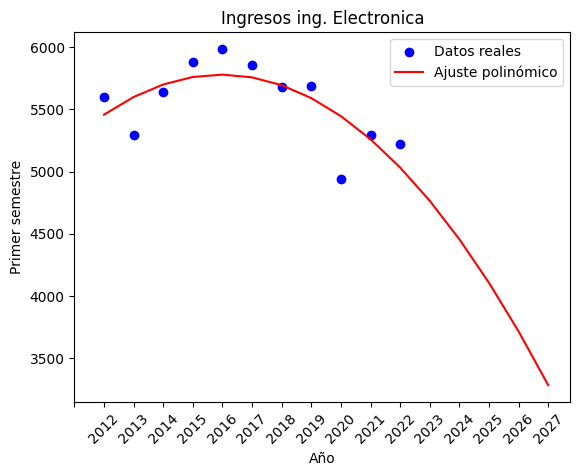

In [130]:
# Ejemplo de datos
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).reshape(-1, 1)
y = df_elec_I['Primer curso'].to_numpy()

# Crear características polinómicas
degree = 2  # Cambiar el grado para una curva más compleja
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)

# Ajustar un modelo de regresión lineal a las características polinómicas
model = LinearRegression()
model.fit(x_poly, y)

x_pred = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)
x_poly_pred = poly_features.fit_transform(x_pred)

# Predicción
y_pred = model.predict(x_poly)

# Evaluar el modelo
mse = mean_squared_error(y, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

y_pred = model.predict(x_poly_pred)

# Visualizar resultados
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x_pred, y_pred, color='red', label='Ajuste polinómico')
plt.title(f'Ingresos ing. Electronica')
plt.xlabel('Año')
plt.ylabel('Primer semestre')

# mostrar años desde 2012 hasta 2027 (en cadenas de caracteres)
años = ['','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027']
plt.xticks(ticks=range(len(años)), labels=años, rotation=45)

plt.legend()
plt.show()

Error cuadrático medio (MSE): 11992.644119516854
Coeficientes: [   0.         -246.84755245   18.37062937]
Intercepto: 3235.399999999998


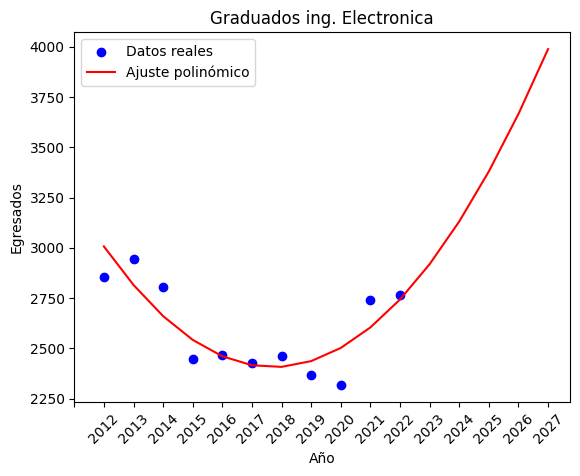

In [124]:
# Ejemplo de datos
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).reshape(-1, 1)
y = df_elec_G['Graduados'].to_numpy()

# Crear características polinómicas
degree = 2  # Cambiar el grado para una curva más compleja
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)

# Ajustar un modelo de regresión lineal a las características polinómicas
model = LinearRegression()
model.fit(x_poly, y)

x_pred = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)
x_poly_pred = poly_features.fit_transform(x_pred)

# Predicción
y_pred = model.predict(x_poly)

# Evaluar el modelo
mse = mean_squared_error(y, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

y_pred = model.predict(x_poly_pred)

# Visualizar resultados
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x_pred, y_pred, color='red', label='Ajuste polinómico')
plt.title(f'Graduados ing. Electronica')
plt.xlabel('Año')
plt.ylabel('Egresados')

# mostrar años desde 2012 hasta 2027 (en cadenas de caracteres)
años = ['','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027']
plt.xticks(ticks=range(len(años)), labels=años, rotation=45)

plt.legend()
plt.show()

## Análisis INGENIERÍA DE SISTEMAS

Error cuadrático medio (MSE): 32142588.8738292
Coeficientes: [    0.         -2313.87272727   613.96969697]
Intercepto: 98311.26666666665


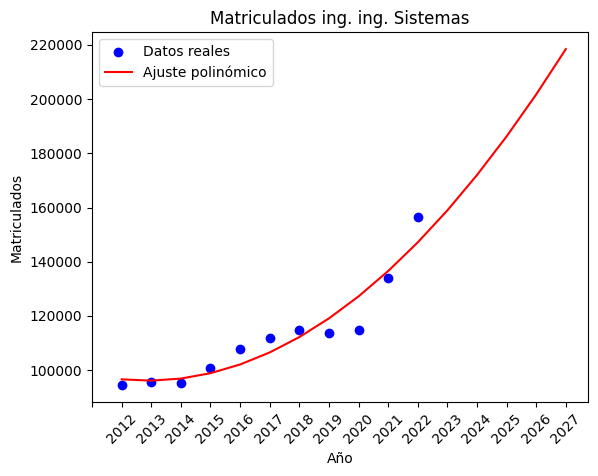

In [128]:
# Ejemplo de datos
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).reshape(-1, 1)
y = df_sis_M['Matriculados'].to_numpy()

# Crear características polinómicas
degree = 2  # Cambiar el grado para una curva más compleja
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)

# Ajustar un modelo de regresión lineal a las características polinómicas
model = LinearRegression()
model.fit(x_poly, y)

x_pred = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)
x_poly_pred = poly_features.fit_transform(x_pred)

# Predicción
y_pred = model.predict(x_poly)

# Evaluar el modelo
mse = mean_squared_error(y, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

y_pred = model.predict(x_poly_pred)

# Visualizar resultados
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x_pred, y_pred, color='red', label='Ajuste polinómico')
plt.title(f'Matriculados ing. ing. Sistemas')
plt.xlabel('Año')
plt.ylabel('Matriculados')

# mostrar años desde 2012 hasta 2027 (en cadenas de caracteres)
años = ['','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027']
plt.xticks(ticks=range(len(años)), labels=años, rotation=45)

plt.legend()
plt.show()

Error cuadrático medio (MSE): 7855523.796651834
Coeficientes: [  0.         500.99230769  61.13170163]
Intercepto: 13012.442424242425


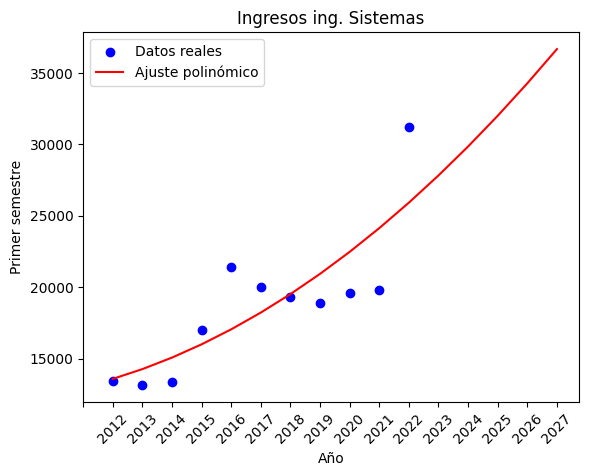

In [131]:
# Ejemplo de datos
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).reshape(-1, 1)
y = df_sis_I['Primer curso'].to_numpy()

# Crear características polinómicas
degree = 2  # Cambiar el grado para una curva más compleja
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)

# Ajustar un modelo de regresión lineal a las características polinómicas
model = LinearRegression()
model.fit(x_poly, y)

x_pred = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)
x_poly_pred = poly_features.fit_transform(x_pred)

# Predicción
y_pred = model.predict(x_poly)

# Evaluar el modelo
mse = mean_squared_error(y, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

y_pred = model.predict(x_poly_pred)

# Visualizar resultados
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x_pred, y_pred, color='red', label='Ajuste polinómico')
plt.title(f'Ingresos ing. Sistemas')
plt.xlabel('Año')
plt.ylabel('Primer semestre')

# mostrar años desde 2012 hasta 2027 (en cadenas de caracteres)
años = ['','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027']
plt.xticks(ticks=range(len(años)), labels=años, rotation=45)

plt.legend()
plt.show()

Error cuadrático medio (MSE): 316523.10616656067
Coeficientes: [   0.         -314.61188811   46.56993007]
Intercepto: 7056.090909090906


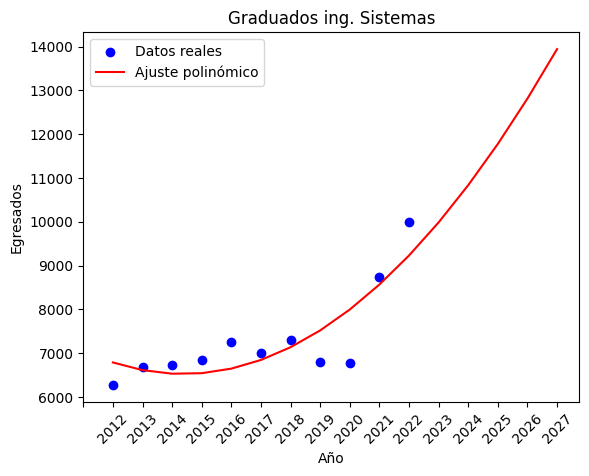

In [125]:
# Ejemplo de datos
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).reshape(-1, 1)
y = df_sis_G['Graduados'].to_numpy()

# Crear características polinómicas
degree = 2  # Cambiar el grado para una curva más compleja
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)

# Ajustar un modelo de regresión lineal a las características polinómicas
model = LinearRegression()
model.fit(x_poly, y)

x_pred = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)
x_poly_pred = poly_features.fit_transform(x_pred)

# Predicción
y_pred = model.predict(x_poly)

# Evaluar el modelo
mse = mean_squared_error(y, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

y_pred = model.predict(x_poly_pred)

# Visualizar resultados
plt.scatter(x, y, color='blue', label='Datos reales')
plt.plot(x_pred, y_pred, color='red', label='Ajuste polinómico')
plt.title(f'Graduados ing. Sistemas')
plt.xlabel('Año')
plt.ylabel('Egresados')

# mostrar años desde 2012 hasta 2027 (en cadenas de caracteres)
años = ['','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027']
plt.xticks(ticks=range(len(años)), labels=años, rotation=45)

plt.legend()
plt.show()